## PROYECTO DE SPRINT 8 Bootcamp Tripleten

### Análisis exploratorio de datos (Python)

1.Importar librerías y datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# Cargar datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_travels = pd.read_csv('/datasets/project_sql_result_07.csv')

2. Chequeo de datos

In [2]:
df_companies.info()
df_neighborhoods.info()
df_travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

In [3]:
df_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df_travels.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Nota: tras verificar que los datos tienen sus tipos correctos y no hay nada que modificar en los mismos, se procede al siguiente paso.

3. Identificar los 10 principales barrios por finalización

In [6]:
top10_neighborhoods = (
    df_neighborhoods
    .sort_values(by='average_trips', ascending=False)
    .head(10)
)

top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


4. Gráfico de empresas de taxis vs número de viajes

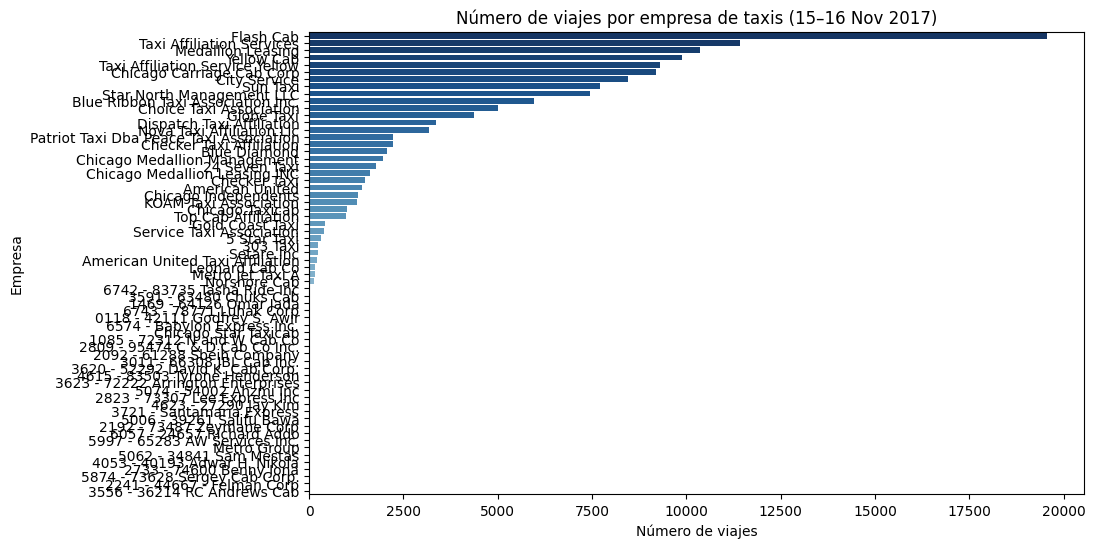

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_companies,
    x='trips_amount',
    y='company_name',
    palette='Blues_r'
)
plt.title('Número de viajes por empresa de taxis (15–16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa')
plt.show()

Resultados: 
-Flash Cab y Taxi Affiliation Services dominan el mercado.
-Existe una alta concentración de viajes en pocas empresas. Específicamente, tras el top 20 empresas, se reduce el número de viajes por empresa de una forma drástica.

5. Top 10 barrios por número de finalizaciones de recorridos

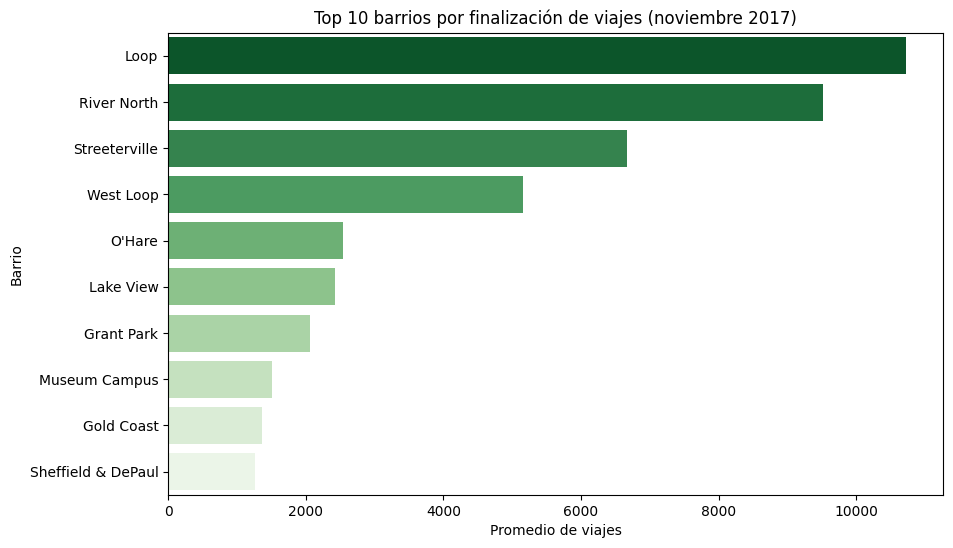

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_neighborhoods,
    x='average_trips',
    y='dropoff_location_name',
    palette='Greens_r'
)
plt.title('Top 10 barrios por finalización de viajes (noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.show()

Resultados:
-Los viajes se concentran en zonas céntricas y comerciales, como lo son Loop y River North, en Chicago. A medida que los barrios son más urbanos, alejados del centro de la ciudad, el número de viajes disminuye.
-Refleja patrones de movilidad urbana típicos (trabajo, ocio, transporte).

## Prueba de hipótesis (Python)

1. Preparación de los datos para el análisis.

In [9]:
#Convertimos la duración a minutos (más intuitivo)
df_travels['duration_minutes'] = df_travels['duration_seconds'] / 60

#Separar los viajes según el clima
bad_weather = df_travels[df_travels['weather_conditions'] == 'Bad']['duration_minutes']
good_weather = df_travels[df_travels['weather_conditions'] == 'Good']['duration_minutes']

#Se verifican los tamaños de los dos datasets:
len(bad_weather), len(good_weather)

(180, 888)

2. Formulación de hipótesis, nivel de significación (alfa), y elección de prueba estadística

-Hipótesis nula (H₀):
La duración promedio de los viajes desde el Loop hasta O’Hare no cambia los sábados lluviosos.

-Hipótesis alternativa (H₁):
La duración promedio de los viajes desde el Loop hasta O’Hare sí cambia los sábados lluviosos.

-Nivel de significación:
Se usará alpha = 0.05, porque es el valor estándar en análisis estadístico.

-Prueba estadística:
Se usará como prueba la t-test porque las muestras tienen tamaños distintos y no asumiremos la igualdad de varianzas.

In [10]:
alpha = 0.05

3. Ejecución de la prueba de hipótesis

In [11]:
t_stat, p_value = stats.ttest_ind(
    bad_weather,
    good_weather,
    equal_var=False
)

t_stat, p_value

if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀)")
else:
    print("No rechazamos la hipótesis nula (H₀)")

Rechazamos la hipótesis nula (H₀)


# CONCLUSIÓN

Se realizó una prueba t-test para comparar la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare en sábados con condiciones climáticas favorables y desfavorables.
Con un nivel de significación de 0.05, se obtuvo un p-value inferior a 0.05, por lo que se rechazó la hipótesis nula.
Esto indica que existe evidencia estadísticamente significativa de que la duración promedio de los viajes cambia en sábados lluviosos, probablemente debido a condiciones de tráfico más lentas y adversas.